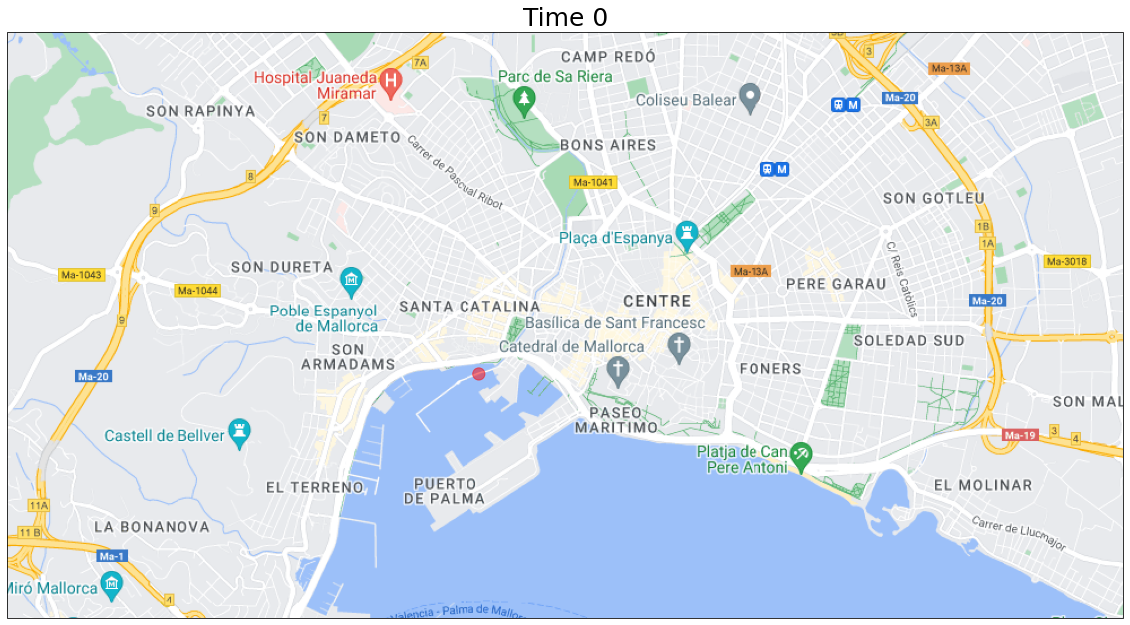

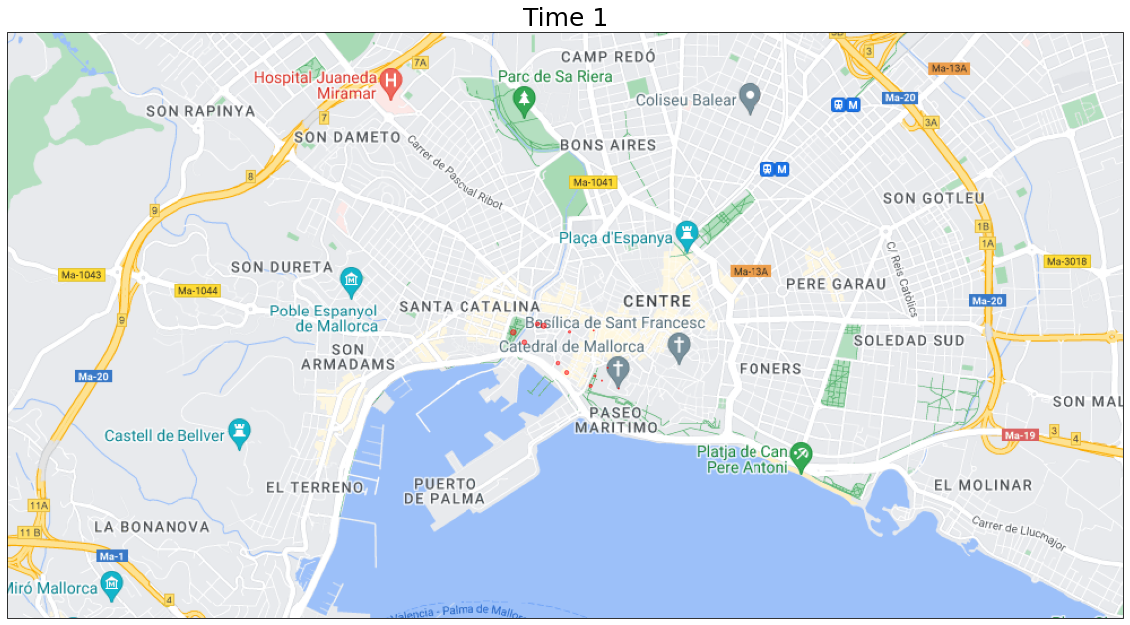

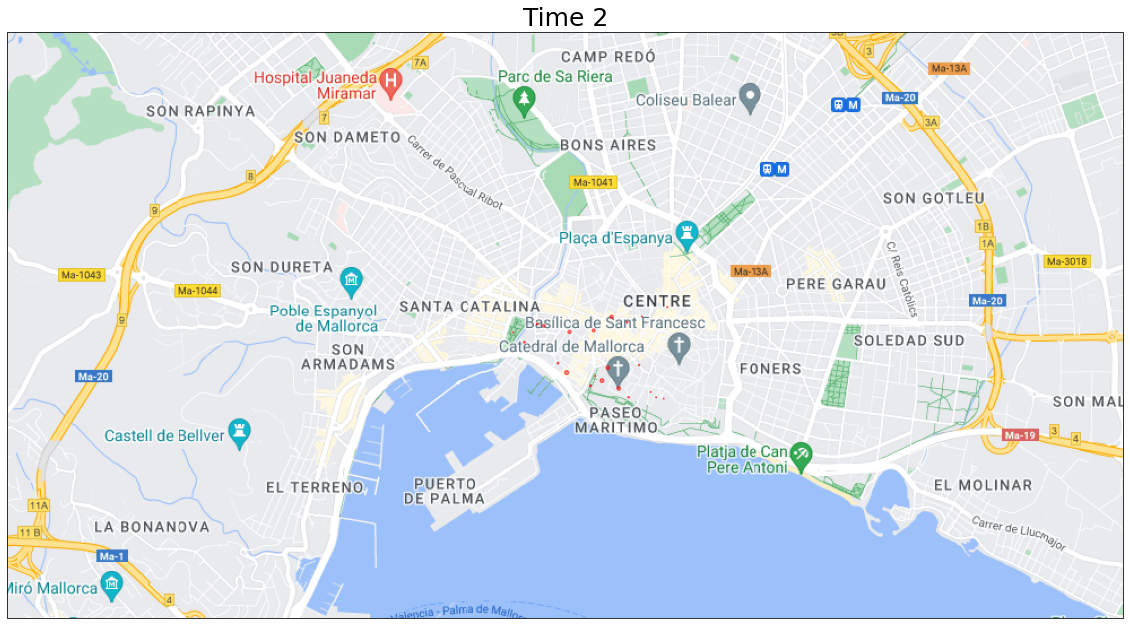

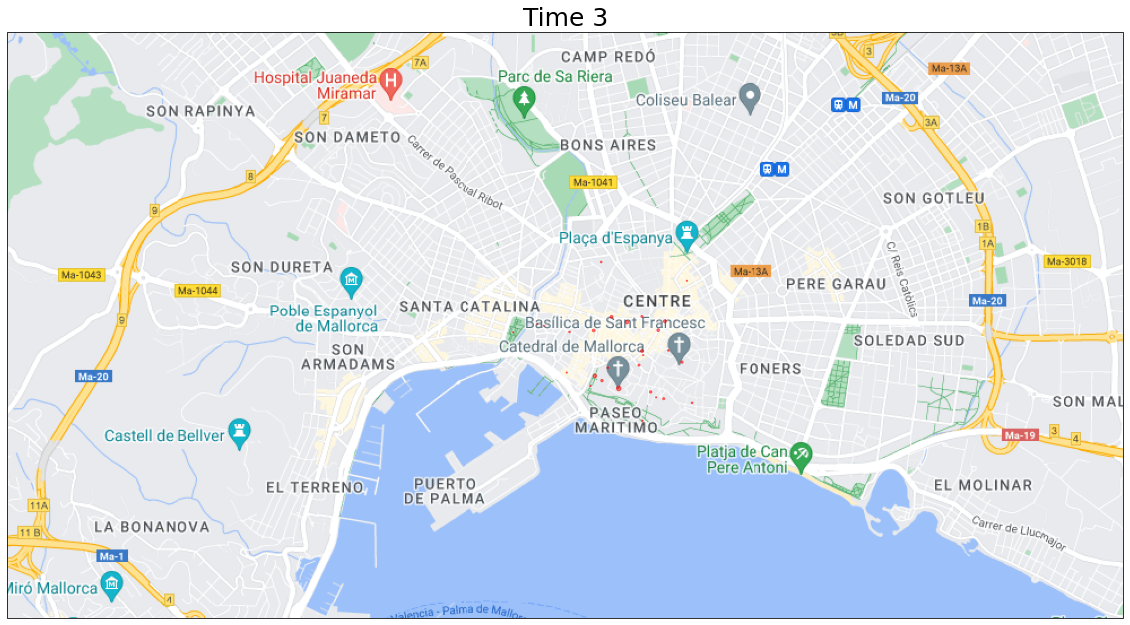

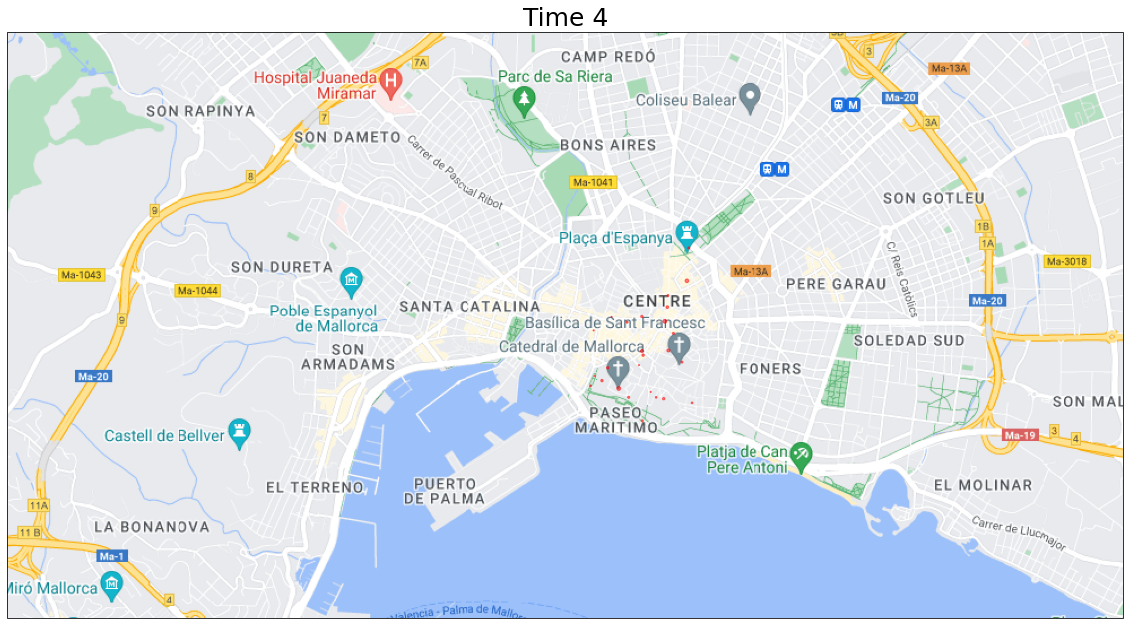

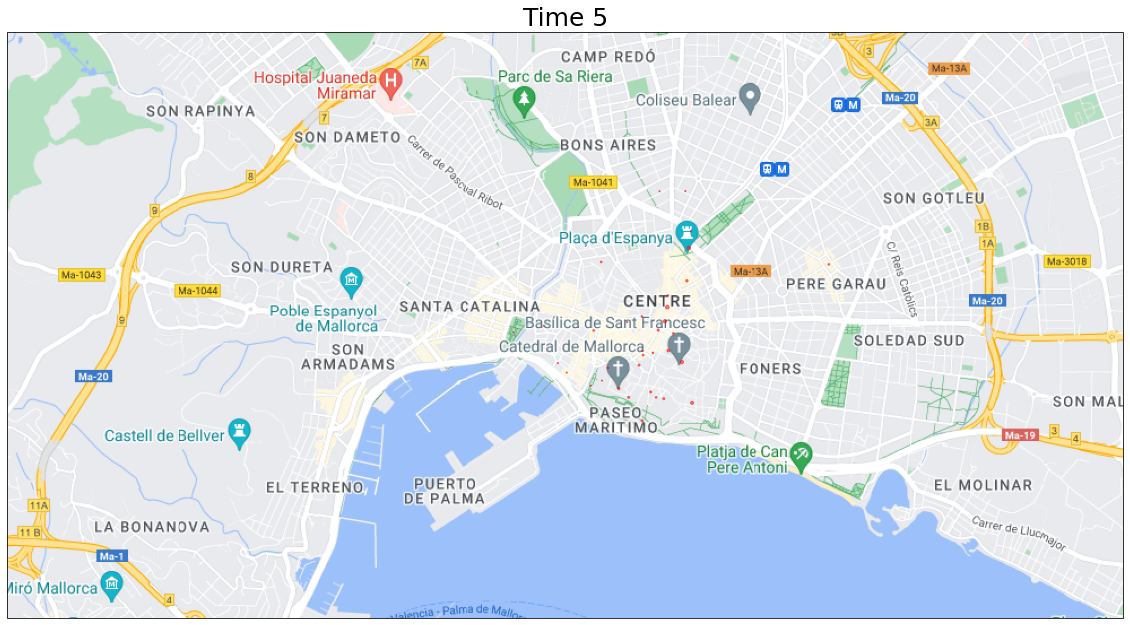

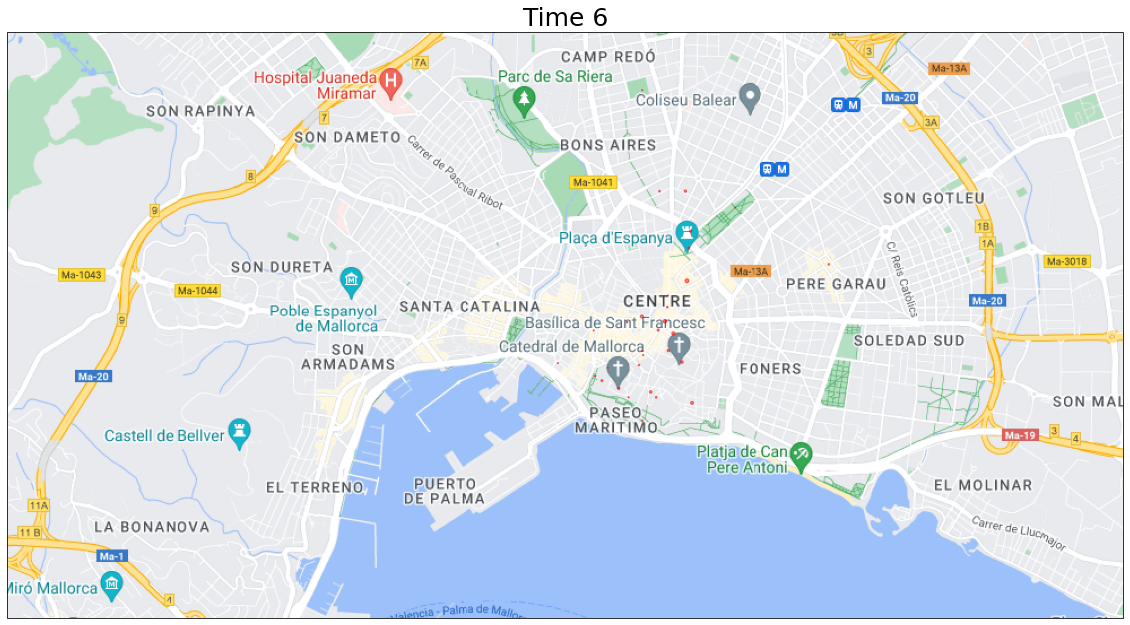

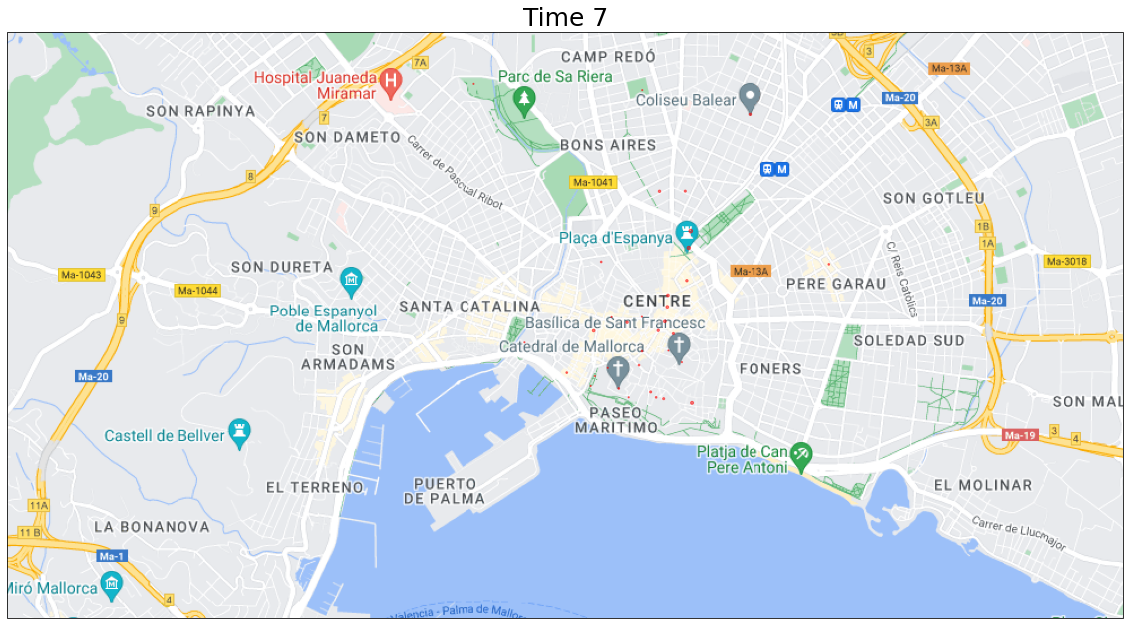

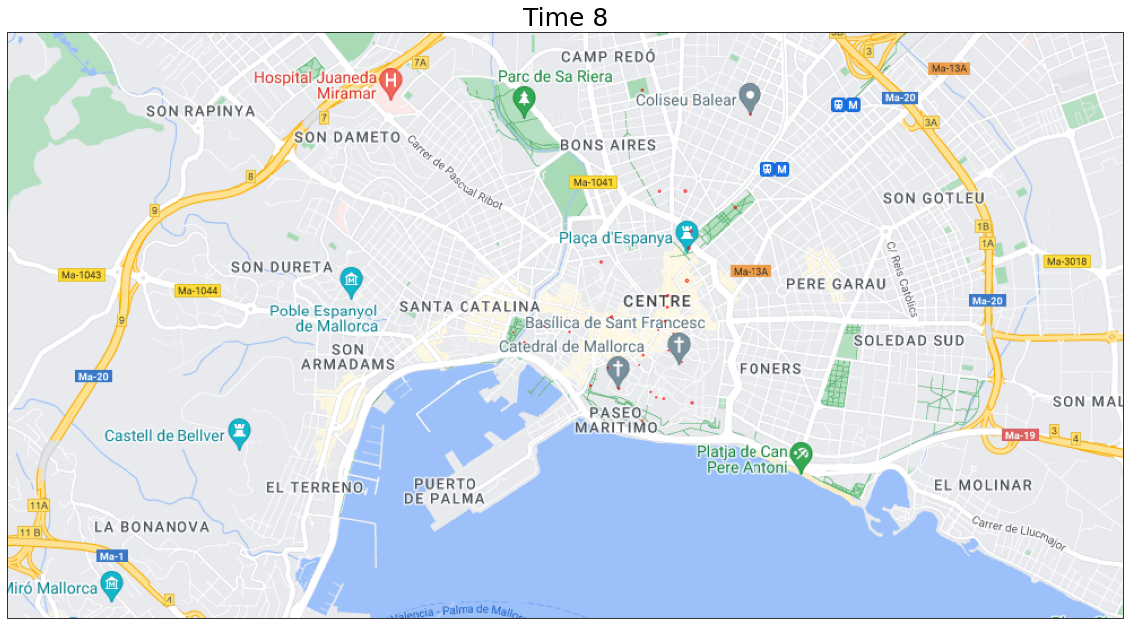

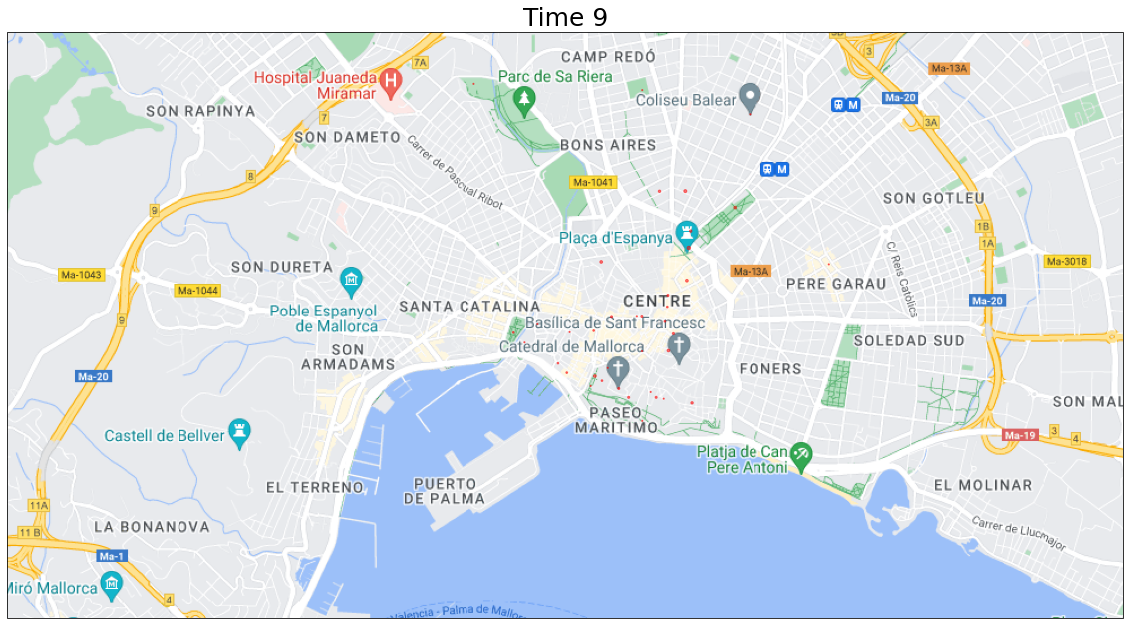

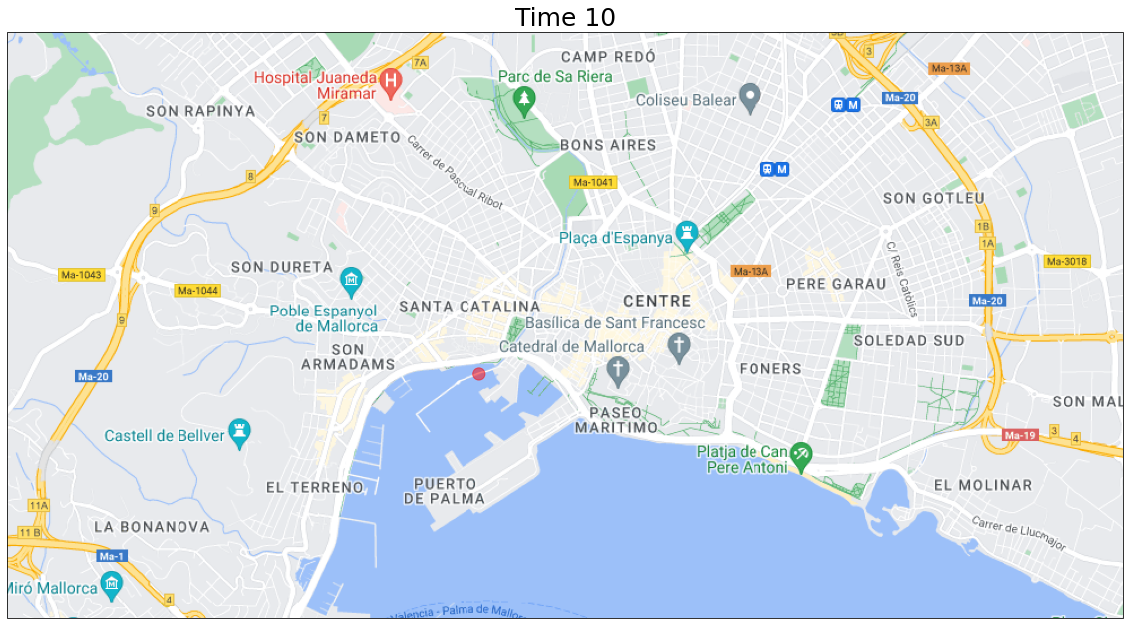

In [3]:
# %load simulation_plots.py
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import imageio
import matplotlib.pyplot as plt
import pandas as pd
from pygifsicle import optimize
import os
import sys
import sys_arguments as saA


def get_tourist_route(tasks, troutes, tourist):
    # values
    latitude = tasks['latitude'].values[troutes.iloc[tourist, :]]
    longitude = tasks['longitude'].values[troutes.iloc[tourist, :]]
    sites = troutes.iloc[tourist, :]
    visit_order = [str(i) for i in range(0, len(troutes.iloc[tourist, :]))]

    if len(set(sites)) != len(sites):
        dupl_route_df = pd.DataFrame(list(zip(visit_order, sites, latitude, longitude)),
                                     columns=['visit_order', 'sites', 'latitude', 'longitude']) \
            .groupby(['sites', 'latitude', 'longitude']).apply(lambda x: ','.join(x.visit_order))
        sites = [name for (name, _, _) in dupl_route_df.index.values]
        latitude = [lat for (_, lat, _) in dupl_route_df.index.values]
        longitude = [lon for (_, _, lon) in dupl_route_df.index.values]
        visit_order = dupl_route_df.values

    # Map background
    fig = plt.figure(figsize=(20, 25))

    tiler = cimgt.GoogleTiles()
    mercator = tiler.crs
    ax = plt.axes(projection=mercator)

    llcrnrlat = 39.553956  # The lower left corner geographical latitude
    llcrnrlon = 2.601714   # The lower left corner geographical longitude
    urcrnrlat = 39.588358  # The upper right corner geographical latitude
    urcrnrlon = 2.686728   # The upper right corner geographical longitude

    ax.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())

    zoom = 14
    ax.add_image(tiler, zoom)

    plt.plot(longitude, latitude, marker='o', color='red', markersize=5, lw=0,
             alpha=0.7, transform=ccrs.Geodetic())

    for visit_order_, xpt, ypt in zip(visit_order, longitude, latitude):
        plt.text(xpt, ypt + 0.0005, visit_order_, horizontalalignment='right', transform=ccrs.Geodetic())

    plt.savefig(f'palmadata/plots/tourist{tourist}_route.png', dpi=199)


def get_time_plots(tasks, time, ntourists, aggregation_function, decision_method):
    for t in range(0, time+1):
        # values
        latitude = tasks.latitude
        longitude = tasks.longitude
        if t < time:
            n_tourists = summary.iloc[t] * 1.5
        else:
            n_tourists = summary.iloc[0] * 1.5

        # Map background
        fig = plt.figure(figsize=(20, 25))

        tiler = cimgt.GoogleTiles()
        mercator = tiler.crs
        ax = plt.axes(projection=mercator)

        ax.set_title(f'Time {t}', fontsize=25)

        llcrnrlat = 39.553956  # The lower left corner geographical latitude
        llcrnrlon = 2.601714   # The lower left corner geographical longitude
        urcrnrlat = 39.588358  # The upper right corner geographical latitude
        urcrnrlon = 2.686728   # The upper right corner geographical longitude

        ax.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())

        zoom = 14
        ax.add_image(tiler, zoom)

        ax.scatter(longitude, latitude, s=n_tourists,
                   color='red', alpha=0.5,
                   transform=ccrs.PlateCarree())

        spath = f'test_sim/plots_{ntourists}_{aggregation_function}_{decision_method}/'
        os.makedirs(spath, exist_ok=True)
        plt.savefig(spath + f'sim_{ntourists}_{t}_{aggregation_function}_{decision_method}.png',
                    dpi=199)

    return 0


def get_time_plots_gif(time, ntourists, aggregation_function, decision_method):
    path = f'test_sim/plots_{ntourists}_{aggregation_function}_{decision_method}/' \
           + f'sim_{ntourists}_{aggregation_function}_{decision_method}.gif'
    images = []
    for t in range(0, time):
        images.append(imageio.imread(f'test_sim/plots_{ntourists}_{aggregation_function}_{decision_method}/'
                                     + f'sim_{ntourists}_{t}_{aggregation_function}_{decision_method}.png'))
    imageio.mimsave(path,
                    images,
                    duration=1)
    optimize(path)

    return 0


if __name__ == "__main__":
    #ntourists, time, aggregation_function, decision_method = sa.get_sysarg()
    ntourists, time, aggregation_function, decision_method = 100, 10, "minimum", "maximum"
    if not (ntourists or time or aggregation_function):
        message = """
        You must introduce all the parameters:
            simulation.py -n <ntourists> -t <time> -a <aggregation_function> -d <decision_method>
        """
        raise Exception(message)

    tasks = pd.read_csv(
                "palmadata/palmapointsofinterest_cleaned.csv",
                header=0,
                dtype={
                    "place": 'str',
                    "description": 'str',
                    "latitude": 'float',
                    "longitude": 'float',
                    "stars": 'float',
                    "reviews": 'float'
                }
            )

    troutes = pd.read_csv(
                f"test_sim/palma_poi_troutes_{ntourists}_{time}_{aggregation_function}_{decision_method}.csv",
                header=0,
                dtype=int
            )
    summary = pd.read_csv(
                f"test_sim/palma_poi_summary_{ntourists}_{time}_{aggregation_function}_{decision_method}.csv",
                header=0,
                dtype=int
            )

    get_time_plots(tasks, int(time), ntourists, aggregation_function, decision_method)
    #get_time_plots_gif(int(time), ntourists, aggregation_function, decision_method)


In [5]:
get_time_plots_gif(int(time), ntourists, aggregation_function, decision_method)

FileNotFoundError: The gifsicle library was not found on your system.
On MacOS it is automatically installed using brew when you use the pip install command.
On other systems, like Linux systems and Windows, it prompts the instructions to be followed for completing the installation.
You can learn more on how to install gifsicle on the gifsicle and pygifsicle documentation.